##### 1) Extract reviews of any product from ecommerce website like amazon, 2) Perform emotion mining

In [14]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
iphone_reviews=[]

In [15]:
iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [16]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [18]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))
iphone_snapdeal

['Superb model , snapdeal delivered as promised time',
 "It's cool phone, good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space, and almost 6 gb are already filled u \xa0read more  ",
 'I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also',
 'It is a nice phone by Apple. Camera is good and phone works perfectly. It is worth a Shot',
 'Its an awesome phone',
 'Very good one perfectly the original one with all original accessories',
 "Ordered for my sister's rakhi gift 1 week prior . however it came faster than that..\nand thanks for getting offer from recharge site.\n\ngreat job team.",
 'offer product is available, customer care also good',
 'very good product...thanks to snapdeal and sellers to delivered the original phone :0)',
 'Satisfied and will buy more products from Snapdeal',
 'A mush have deal',
 'Excellent Product & Good Service by Snap Deal.',
 'Very good product 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

In [20]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['Superb model,snapdeal delivered as promised time',"""It's cool phone",good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space,"and almost 6 gb are already filled u \xa0read more """,'I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also','It is a nice phone by Apple. Camera is good and phone works perfectly. It is worth a Shot','Its an awesome phone','Very good one perfectly the original one with all original accessories',"""Ordered for my sister's rakhi gift 1 week prior . however it came faster than that..\nand thanks for getting offer from recharge site.\n\ngreat job team.""",...,I was not satisfied with the performance. So,thought of going for iPhone. Though,I didnt want to go for iPhone 6S as it was very costly for me. So,decided that I will buy iPhone 5C.\n\nSnapdeal has provided me a very great deal as compared to other sites. Also,the delivery was very prompt as well.\n\nPros: Sleek phone,looks sexy,no lags,really great headphone,got upgrade to iOS 9\n\nCons: Plastic body','I am really happy with product']


### Text processing

In [64]:
# removing both the leading and the trailing characters such as spaces in tweets
reviews = [x.strip() for x in reviews.Text]

reviews=[Text for Text in reviews if Text] # removes empty strings, because they are considered in Python as False
reviews[0:10]



AttributeError: ResultSet object has no attribute 'Text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [22]:
# Remove Punctuations 
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Superb model   snapdeal delivered as promised time  Its cool phone  good processing with latest iOS The cons are Low memory space There is total 8 gb space  and almost 6 gb are already filled u xa0read more    I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other sites and store also  It is a nice phone by Apple Camera is good and phone works perfectly It is worth a Shot  Its an awesome phone  Very good one perfectly the original one with all original accessories  Ordered for my sisters rakhi gift 1 week prior  however it came faster than thatnand thanks for getting offer from recharge sitenngreat job team  offer product is available  customer care also good  very good productthanks to snapdeal and sellers to delivered the original phone 0  Satisfied and will buy more products from Snapdeal  A mush have deal  Excellent Product  Good Service by Snap Deal  Very good product and delivered in time  as committed true value for money  The

In [23]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Superb model   snapdeal delivered as promised time  Its cool phone  good processing with latest iOS The cons are Low memory space There is total 8 gb space  and almost 6 gb are already filled u xa0read more    I got my iPhone 5c white colour in good condition and best rate nsnapdeal rate is always lowest then other sites and store also  It is a nice phone by Apple Camera is good and phone works perfectly It is worth a Shot  Its an awesome phone  Very good one perfectly the original one with all original accessories  Ordered for my sisters rakhi gift 1 week prior  however it came faster than thatnand thanks for getting offer from recharge sitenngreat job team  offer product is available  customer care also good  very good productthanks to snapdeal and sellers to delivered the original phone 0  Satisfied and will buy more products from Snapdeal  A mush have deal  Excellent Product  Good Service by Snap Deal  Very good product and delivered in time  as committed true value for money  The

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Superb', 'model', 'snapdeal', 'delivered', 'as', 'promised', 'time', 'Its', 'cool', 'phone', 'good', 'processing', 'with', 'latest', 'iOS', 'The', 'cons', 'are', 'Low', 'memory', 'space', 'There', 'is', 'total', '8', 'gb', 'space', 'and', 'almost', '6', 'gb', 'are', 'already', 'filled', 'u', 'xa0read', 'more', 'I', 'got', 'my', 'iPhone', '5c', 'white', 'colour', 'in', 'good', 'condition', 'and', 'best', 'rate', 'nsnapdeal', 'rate', 'is', 'always', 'lowest', 'then', 'other', 'sites', 'and', 'store', 'also', 'It', 'is', 'a', 'nice', 'phone', 'by', 'Apple', 'Camera', 'is', 'good', 'and', 'phone', 'works', 'perfectly', 'It', 'is', 'worth', 'a', 'Shot', 'Its', 'an', 'awesome', 'phone', 'Very', 'good', 'one', 'perfectly', 'the', 'original', 'one', 'with', 'all', 'original', 'accessories', 'Ordered', 'for', 'my', 'sisters', 'rakhi', 'gift', '1', 'week', 'prior', 'however', 'it', 'came', 'faster', 'than', 'thatnand', 'thanks', 'for', 'getting', 'offer', 'from', 'recharge', 'sitenngreat', 'jo

In [26]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Tokens count
len(text_tokens)

1573

In [28]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Superb', 'model', 'snapdeal', 'delivered', 'promised', 'time', 'Its', 'cool', 'phone', 'good', 'processing', 'latest', 'iOS', 'The', 'cons', 'Low', 'memory', 'space', 'There', 'total', '8', 'gb', 'space', 'almost', '6', 'gb', 'already', 'filled', 'u', 'xa0read', 'got', 'iPhone', '5c', 'white', 'colour', 'good', 'condition', 'best', 'rate', 'nsnapdeal', 'rate', 'always', 'lowest', 'sites', 'store', 'also', 'It', 'nice', 'phone', 'Apple', 'Camera', 'good', 'phone', 'works', 'perfectly', 'It', 'worth', 'Shot', 'Its', 'awesome', 'phone', 'Very', 'good', 'one', 'perfectly', 'original', 'one', 'original', 'accessories', 'Ordered', 'sisters', 'rakhi', 'gift', '1', 'week', 'prior', 'however', 'came', 'faster', 'thatnand', 'thanks', 'getting', 'offer', 'recharge', 'sitenngreat', 'job', 'team', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'good', 'productthanks', 'snapdeal', 'sellers', 'delivered', 'original', 'phone', '0', 'Satisfied', 'buy', 'products', 'Snapdeal', 'A

In [29]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['phone', '0', 'satisfied', 'buy', 'products', 'snapdeal', 'a', 'mush', 'deal', 'excellent', 'product', 'good', 'service', 'snap', 'deal', 'very', 'good', 'product', 'delivered', 'time', 'committed', 'true', 'value', 'money', 'the', 'product', 'supplied', 'snapdeal', 'good', 'best', 'price', 'it', 'shown', 'best', 'phone', 'iphone', 'service', 'quality', 'good', 'level', 'interactions', 'good', 'awesome', 'iphone', 'price', 'rangeni', 'would', 'recommend', 'phone', 'mobile', 'got', 'hang', 'smooth', 'touch', 'performing', 'well', 'bought', 'iphone', '5c', 'best', 'deal', 'ever', 'product', 'quite', 'good', 'also', 'updated', 'latest', 'ios', 'versionnvery', 'happy', 'deal', 'its', 'good', 'value', 'money', 'paid', 'the', 'item', 'well', 'packed', 'delivered', 'time', 'good', 'phone', 'lacks', 'feel', 'very', 'good', 'service', 'seller', 'faster', 'delivery', 'proper', 'packing', 'good', 'product', 'packing', 'also', 'good']


In [30]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['phone', '0', 'satisfi', 'buy', 'product', 'snapdeal', 'a', 'mush', 'deal', 'excel', 'product', 'good', 'servic', 'snap', 'deal', 'veri', 'good', 'product', 'deliv', 'time', 'commit', 'true', 'valu', 'money', 'the', 'product', 'suppli', 'snapdeal', 'good', 'best', 'price', 'it', 'shown', 'best', 'phone', 'iphon', 'servic', 'qualiti', 'good', 'level', 'interact', 'good', 'awesom', 'iphon', 'price', 'rangeni', 'would', 'recommend', 'phone', 'mobil', 'got', 'hang', 'smooth', 'touch', 'perform', 'well', 'bought', 'iphon', '5c', 'best', 'deal', 'ever', 'product', 'quit', 'good', 'also', 'updat', 'latest', 'io', 'versionnveri', 'happi', 'deal', 'it', 'good', 'valu', 'money', 'paid', 'the', 'item', 'well', 'pack', 'deliv', 'time', 'good', 'phone', 'lack', 'feel', 'veri', 'good', 'servic', 'seller', 'faster', 'deliveri', 'proper', 'pack', 'good', 'product', 'pack', 'also', 'good']


In [31]:
!pip3 install en_core_web_sm
!python -m spacy download %


[x] No compatible package found for '%' (spaCy v3.4.1)



2022-10-11 21:11:54.445784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-11 21:11:54.445815: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-11 21:11:57.463522: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-11 21:11:57.463542: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-11 21:11:57.465663: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: MuMo-Lappitoppy
2022-10-11 21:11:57.465712: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: MuMo-Lappitoppy


In [32]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

superb model snapdeal delivered promised time its cool phone good processing latest ios the cons low memory space there total 8 gb space almost 6 gb already filled u xa0read got iphone 5c white colour good condition best rate nsnapdeal rate always lowest sites store also it nice phone apple camera good phone works perfectly it worth shot its awesome phone very good one perfectly original one original accessories ordered sisters rakhi gift 1 week prior however came faster thatnand thanks getting offer recharge sitenngreat job team offer product available customer care also good good productthanks snapdeal sellers delivered original phone 0 satisfied buy products snapdeal a mush deal excellent product good service snap deal very good product delivered time committed true value money the product supplied snapdeal good best price it shown best phone iphone service quality good level interactions good awesome iphone price rangeni would recommend phone mobile got hang smooth touch performing

In [33]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['superb', 'model', 'snapdeal', 'deliver', 'promise', 'time', 'its', 'cool', 'phone', 'good', 'processing', 'late', 'io', 'the', 'con', 'low', 'memory', 'space', 'there', 'total', '8', 'gb', 'space', 'almost', '6', 'gb', 'already', 'fill', 'u', 'xa0read', 'get', 'iphone', '5c', 'white', 'colour', 'good', 'condition', 'good', 'rate', 'nsnapdeal', 'rate', 'always', 'low', 'site', 'store', 'also', 'it', 'nice', 'phone', 'apple', 'camera', 'good', 'phone', 'work', 'perfectly', 'it', 'worth', 'shoot', 'its', 'awesome', 'phone', 'very', 'good', 'one', 'perfectly', 'original', 'one', 'original', 'accessory', 'order', 'sister', 'rakhi', 'gift', '1', 'week', 'prior', 'however', 'come', 'fast', 'thatnand', 'thank', 'getting', 'offer', 'recharge', 'sitenngreat', 'job', 'team', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'good', 'productthank', 'snapdeal', 'seller', 'deliver', 'original', 'phone', '0', 'satisfied', 'buy', 'product', 'snapdeal', 'a', 'mush', 'deal', 'excell

In [34]:
clean_comments=' '.join(lemmas)
clean_comments

'superb model snapdeal deliver promise time its cool phone good processing late io the con low memory space there total 8 gb space almost 6 gb already fill u xa0read get iphone 5c white colour good condition good rate nsnapdeal rate always low site store also it nice phone apple camera good phone work perfectly it worth shoot its awesome phone very good one perfectly original one original accessory order sister rakhi gift 1 week prior however come fast thatnand thank getting offer recharge sitenngreat job team offer product available customer care also good good productthank snapdeal seller deliver original phone 0 satisfied buy product snapdeal a mush deal excellent product good service snap deal very good product deliver time commit true value money the product supply snapdeal good good price it show good phone iphone service quality good level interaction good awesome iphone price rangeni would recommend phone mobile got hang smooth touch perform well buy iphone 5c good deal ever pr

### Feature Extaction

##### Using CountVectorizer

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [36]:
print(cv.vocabulary_)

{'superb': 347, 'model': 207, 'snapdeal': 333, 'deliver': 95, 'promise': 268, 'time': 368, 'its': 180, 'cool': 77, 'phone': 245, 'good': 143, 'processing': 263, 'late': 185, 'io': 170, 'the': 358, 'con': 72, 'low': 195, 'memory': 203, 'space': 339, 'there': 359, 'total': 373, 'gb': 137, 'almost': 19, 'already': 20, 'fill': 127, 'xa0read': 407, 'get': 139, 'iphone': 173, '5c': 7, 'white': 397, 'colour': 67, 'condition': 73, 'rate': 283, 'nsnapdeal': 224, 'always': 22, 'site': 327, 'store': 344, 'also': 21, 'it': 177, 'nice': 221, 'apple': 28, 'camera': 55, 'work': 404, 'perfectly': 242, 'worth': 405, 'shoot': 318, 'awesome': 33, 'very': 391, 'one': 227, 'original': 233, 'accessory': 12, 'order': 232, 'sister': 326, 'rakhi': 281, 'gift': 141, 'week': 394, 'prior': 258, 'however': 163, 'come': 68, 'fast': 123, 'thatnand': 357, 'thank': 355, 'getting': 140, 'offer': 226, 'recharge': 289, 'sitenngreat': 328, 'job': 181, 'team': 352, 'product': 264, 'available': 32, 'customer': 85, 'care': 5

In [37]:
print(cv.get_feature_names()[100:200])

['discount', 'dispatchnprosn1', 'display', 'do', 'doubt', 'doubtfull', 'dream', 'dt', 'due', 'earn', 'easy', 'eliveryi', 'emi', 'essy', 'even', 'ever', 'everyone', 'everything', 'excellent', 'expectation', 'experience', 'fake', 'family', 'fast', 'feature', 'feel', 'file', 'fill', 'find', 'finger', 'first', 'five', 'flaw', 'fraudulent', 'free', 'friend', 'fully', 'gb', 'genuine', 'get', 'getting', 'gift', 'go', 'good', 'goodbut', 'goood', 'got', 'grand', 'great', 'guess', 'hahahaha', 'hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heat', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'in', 'initially', 'inter', 'interaction', 'interest', 'io', 'ios', 'ios9', 'iphone', 'iphone5c', 'iphoneearli', 'issue', 'it', 'item', 'itnniphone', 'its', 'job', 'lack', 'lag', 'lagging', 'late', 'leave', 'level', 'like', 'limit', 'listnnapple', 'little', 'look', 'love', 'lovely', 'low', 'make', 'manufacturer', 'mark', 'marvallous']


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
print(clean_commentscv.toarray().shape)

(1028, 410)


### CountVectorizer with N-grams (Bigrams & Trigrams)

In [40]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [41]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['100', '5c', 'also', 'amazing', 'and', 'apple', 'awesome', 'battery', 'be', 'body', 'box', 'brand', 'budget', 'but', 'buy', 'camera', 'cheap', 'condition', 'cool', 'day', 'deal', 'deliver', 'delivery', 'do', 'even', 'excellent', 'experience', 'fast', 'file', 'gb', 'genuine', 'get', 'go', 'good', 'got', 'great', 'hang', 'happy', 'interest', 'io', 'iphone', 'issue', 'it', 'its', 'late', 'like', 'look', 'low', 'memory', 'mobile', 'need', 'new', 'nice', 'not', 'one', 'order', 'original', 'pack', 'perfect', 'phone', 'plastic', 'price', 'problem', 'product', 'quality', 'really', 'receive', 'recommend', 'satisfactory', 'satisfied', 'say', 'scheme', 'seller', 'service', 'shipping', 'site', 'snap', 'snapdeal', 'so', 'space', 'superb', 'take', 'thank', 'the', 'this', 'though', 'till', 'time', 'transfer', 'true', 'update', 'use', 'very', 'want', 'well', 'within', 'work', 'worth', 'would', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 

### TF-IDF Vectorizer

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [43]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '1000rs', '2030', '20k', '24', '2nd', '5c', '5cnnsnapdeal', '6s', '9nncons', 'absolutly', 'accessory', 'account', 'action', 'ad', 'adorable', 'affordable', 'after', 'almost', 'already', 'also', 'always', 'amazing', 'and', 'andriodblackberrywindow', 'android', 'app', 'apple', 'around', 'as', 'attractive', 'available', 'awesome', 'awesum', 'awsme', 'awwsum', 'back', 'battery', 'be', 'beatifully', 'beautiful', 'believe', 'bit', 'bluetooth', 'body', 'bodyn2', 'box', 'brand', 'bt', 'budget', 'build', 'business', 'but', 'buy', 'camera', 'can', 'capacity', 'care', 'category', 'cell', 'charge', 'cheap', 'choice', 'choose', 'class', 'close', 'colour', 'come', 'commit', 'compare', 'competitive', 'con', 'condition', 'conditionnno', 'consist', 'contact', 'cool', 'costly', 'coupon', 'courier', 'cr', 'crazy', 'credit', 'crisp', 'customer', 'damage', 'dat', 'datum', 'day', 'daynand', 'deal', 'dear', 'decide', 'defination', 'deliver', 'delivery', 'delivry', 'dere', 'dis', 'discount', 'di

### Generate Word Cloud

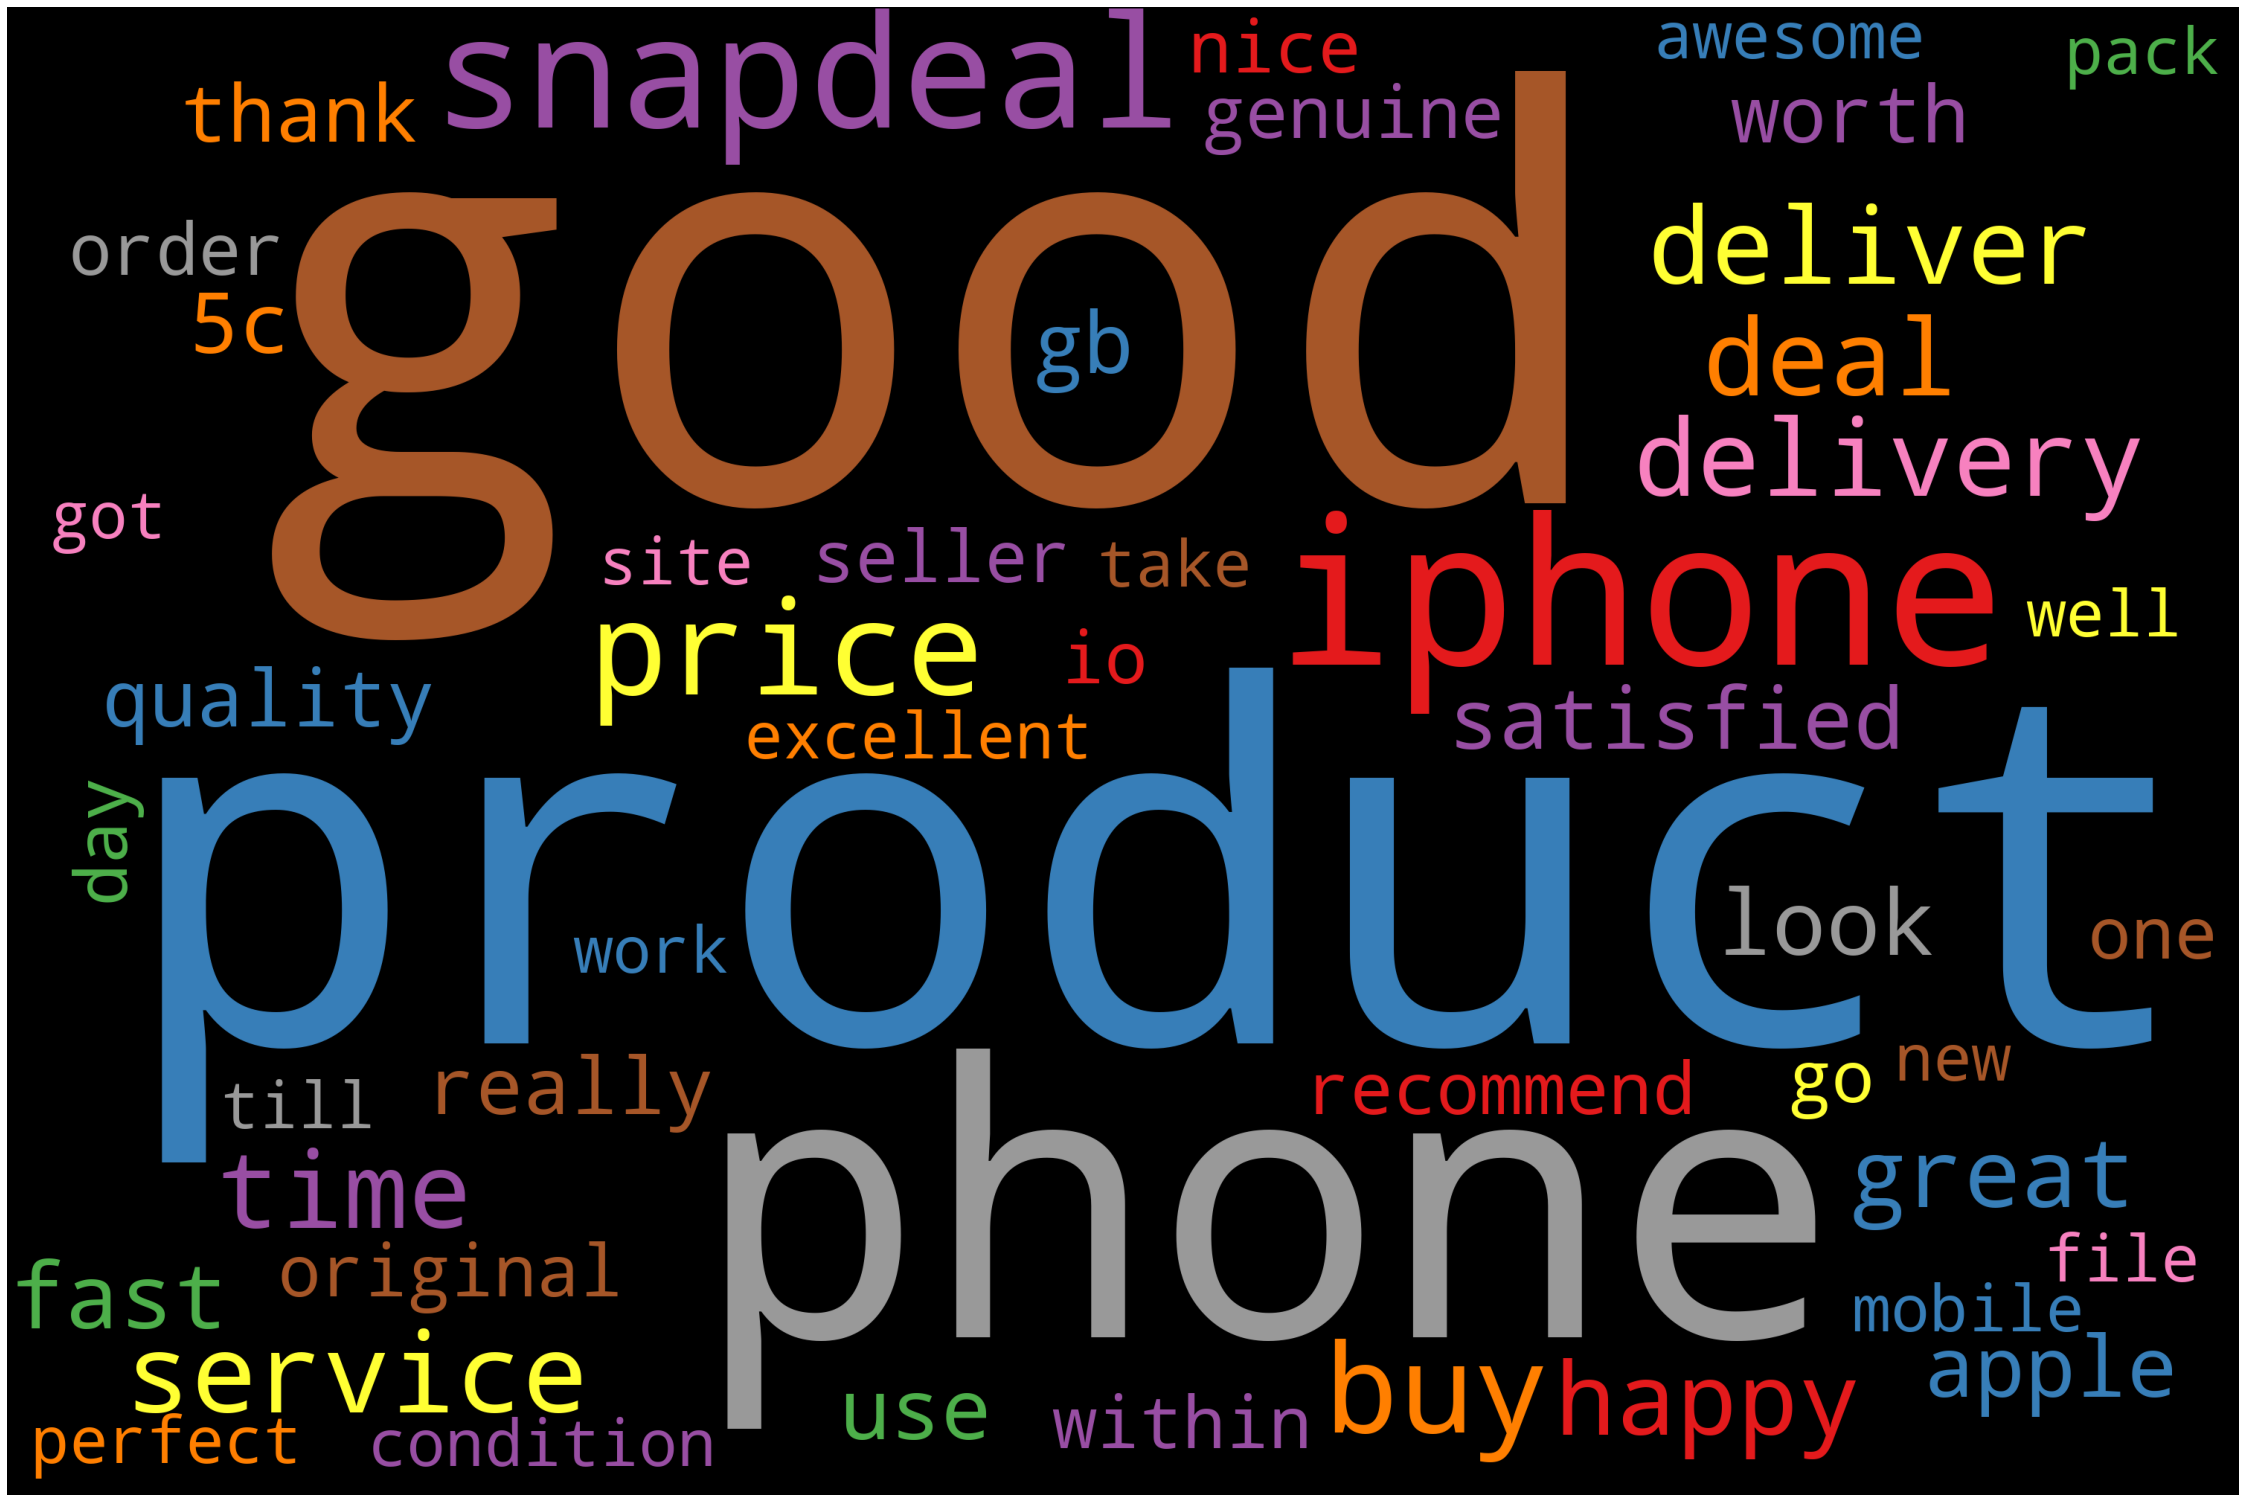

In [44]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

### Named Entity Recognition (NER)

In [45]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [46]:
for token in doc_block[100:200]:
    print(token,token.pos_)

phone NOUN
0 NUM
satisfied ADJ
buy NOUN
product NOUN
snapdeal VERB
a DET
mush NOUN
deal VERB
excellent ADJ
product NOUN
good ADJ
service NOUN
snap NOUN
deal NOUN
very ADV
good ADJ
product NOUN
deliver VERB
time NOUN
commit VERB
true ADJ
value NOUN
money NOUN
the DET
product NOUN
supply NOUN
snapdeal ADJ
good ADJ
good ADJ
price NOUN
it PRON
show VERB
good ADJ
phone NOUN
iphone NOUN
service NOUN
quality NOUN
good ADJ
level NOUN
interaction NOUN
good ADJ
awesome ADJ
iphone NOUN
price NOUN
rangeni NOUN
would AUX
recommend VERB
phone NOUN
mobile NOUN
got AUX
hang VERB
smooth ADJ
touch NOUN
perform NOUN
well ADV
buy VERB
iphone NOUN
5c NUM
good ADJ
deal NOUN
ever ADV
product VERB
quite ADV
good ADJ
also ADV
update VERB
late ADV
io ADP
versionnvery PROPN
happy ADJ
deal VERB
its PRON
good ADJ
value NOUN
money NOUN
pay VERB
the DET
item NOUN
well ADV
pack INTJ
deliver VERB
time NOUN
good ADJ
phone NOUN
lack NOUN
feel VERB
very ADV
good ADJ
service NOUN
seller NOUN
fast ADJ
delivery NOUN
proper 

In [47]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['pack', 'issue', 'courier', 'take', 'day', 'deliver', 'memory', 'fill', 'gb', 'limit', 'switch', 'android', 'apple', 'iphone', 'camera', 'crisp', 'display', 'battery', 'issue', 'solve', 'ios9', 'update', 'm', 'service', 'recommend', 'service', 'buy', 'iphone', 'product', 'wor', 'price', 'shop', 'side', 'phone', 'class', 'service', 'ð\x9f\x98\x98', 'budget', 'iphone', 'go', 'want', 'iphone', 'experience', 'budget', 'picture', 'quality', 'sound', 'hear', 'ad', 'look', 'feel', 'ncon', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow', 'iphone', 'use', 'file', 'transfer', 'app', 'iphone', 'time', 'delivery', 'star', 'product', 'buy', 'phone', 'delivery', 'snap', 'deal', 'm', 'service', 'thing', 'buy', 'year', 'perfect', 'lagging', 'business', 'need', 'phone', 'price', 'category', 'manufacturer', 'price', 'buy', 'snap', 'deal', 'price', 'servicenthank', 'phone', 'price', 'price', 'seller', 'product', 'shipping', 'recommend', 'iphone', 'apple']


In [48]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,40
1,phone,28
2,iphone,28
3,price,17
4,buy,15
5,service,12
6,deliver,11
7,time,11
8,deal,11
9,delivery,11


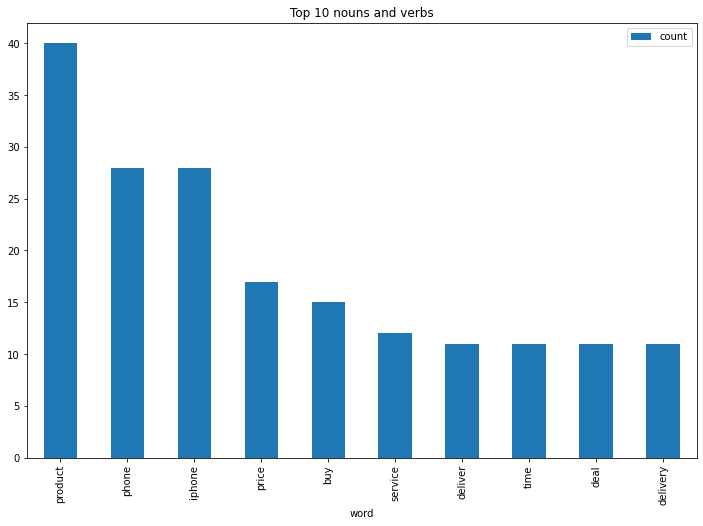

In [49]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

### Emotion Mining - Sentiment Analysis

In [54]:
ip_snapd

'[\'Superb model   snapdeal delivered as promised time\'  "It\'s cool phone  good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space  and almost 6 gb are already filled u \\xa0read more  "  \'I got my iPhone 5c white colour in good condition and best rate \\nsnapdeal rate is always lowest then other sites and store also\'  \'It is a nice phone by Apple. Camera is good and phone works perfectly. It is worth a Shot\'  \'Its an awesome phone\'  \'Very good one perfectly the original one with all original accessories\'  "Ordered for my sister\'s rakhi gift 1 week prior . however it came faster than that..\\nand thanks for getting offer from recharge site.\\n\\ngreat job team."  \'offer product is available  customer care also good\'  \'very good product...thanks to snapdeal and sellers to delivered the original phone :0)\'  \'Satisfied and will buy more products from Snapdeal\'  \'A mush have deal\'  \'Excellent Product & Good Service by Snap Deal.\'  \'V

In [65]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

["Superb model , snapdeal delivered as promised time It's cool phone, good processing with latest iOS.",
 'The cons are: Low memory space.',
 'There is total 8 gb space, and almost 6 gb are already filled u \xa0read more   I got my iPhone 5c white colour in good condition and best rate \nsnapdeal rate is always lowest then other sites and store also It is a nice phone by Apple.',
 'Camera is good and phone works perfectly.',
 "It is worth a Shot Its an awesome phone Very good one perfectly the original one with all original accessories Ordered for my sister's rakhi gift 1 week prior .",
 'however it came faster than that..\nand thanks for getting offer from recharge site.',
 'great job team.',
 'offer product is available, customer care also good very good product...thanks to snapdeal and sellers to delivered the original phone :0) Satisfied and will buy more products from Snapdeal A mush have deal Excellent Product & Good Service by Snap Deal.',
 'Very good product and delivered in ti

In [66]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"Superb model , snapdeal delivered as promised ..."
1,The cons are: Low memory space.
2,"There is total 8 gb space, and almost 6 gb are..."
3,Camera is good and phone works perfectly.
4,It is worth a Shot Its an awesome phone Very g...
...,...
122,"Though, I didnt want to go for iPhone 6S as it..."
123,"So, decided that I will buy iPhone 5C."
124,Snapdeal has provided me a very great deal as ...
125,"Also, the delivery was very prompt as well."


In [67]:
# Emotion Lexicon - Affin
affin=pd.read_csv('DS Class Materials\Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [68]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [69]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [70]:
# manual testing
calculate_sentiment(text='great')

3

In [71]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      10
1       0
2       9
3       6
4      14
       ..
122    -1
123     0
124     3
125     0
126     7
Name: sentiment_value, Length: 127, dtype: int64

In [72]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      16
1       6
2      47
3       7
4      30
       ..
122    16
123     8
124    13
125     8
126    24
Name: word_count, Length: 127, dtype: int64

In [73]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
69,But those all reviews are fake and just to dam...,-6,14
46,Dont buy on fraudulent schemes.,-4,5
54,Dere is only one problem nd dat is space... Bt...,-4,20
33,no lagging till today\nsuitable for your busin...,-3,9
92,Only problem is you need to pay for everything.,-3,9
...,...,...,...
26,"Pros : Picture quality is awesome, sound with ...",12,38
60,my wife wanted to try an iphone and she is lov...,13,31
4,It is worth a Shot Its an awesome phone Very g...,14,30
59,lovely fastest super Amazing product at this ...,16,56


In [74]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    127.000000
mean       2.905512
std        4.024593
min       -6.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       18.000000
Name: sentiment_value, dtype: float64

In [75]:
# negative sentiment score of the whole review>
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,The cons are: Low memory space.,0,6
15,The Item was well packed and delivered on ti...,0,10
18,Faster delivery and proper packing.,0,5
23,I M Happy With iphone5c and snapdeal services.,0,8
28,I am new to iphone so till now this is it.,0,11
33,no lagging till today\nsuitable for your busin...,-3,9
36,Genuine Product.,0,2
37,Fast Shipping.,0,2
41,Unless you're not a heavy files user.,0,7
43,Even though the phone was available from other...,0,13


In [76]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,"Superb model , snapdeal delivered as promised ...",10,16
2,"There is total 8 gb space, and almost 6 gb are...",9,47
3,Camera is good and phone works perfectly.,6,7
4,It is worth a Shot Its an awesome phone Very g...,14,30
5,however it came faster than that..\nand thanks...,2,14
...,...,...,...
116,Packing was superb with 'PRIORITY' mark on the...,5,13
117,The product quality is good but the only thing...,6,51
120,"After using android for 3 years, I was not sat...",2,13
124,Snapdeal has provided me a very great deal as ...,3,13


In [77]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"Superb model , snapdeal delivered as promised ...",10,16,0
1,The cons are: Low memory space.,0,6,1
2,"There is total 8 gb space, and almost 6 gb are...",9,47,2
3,Camera is good and phone works perfectly.,6,7,3
4,It is worth a Shot Its an awesome phone Very g...,14,30,4
...,...,...,...,...
122,"Though, I didnt want to go for iPhone 6S as it...",-1,16,122
123,"So, decided that I will buy iPhone 5C.",0,8,123
124,Snapdeal has provided me a very great deal as ...,3,13,124
125,"Also, the delivery was very prompt as well.",0,8,125


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

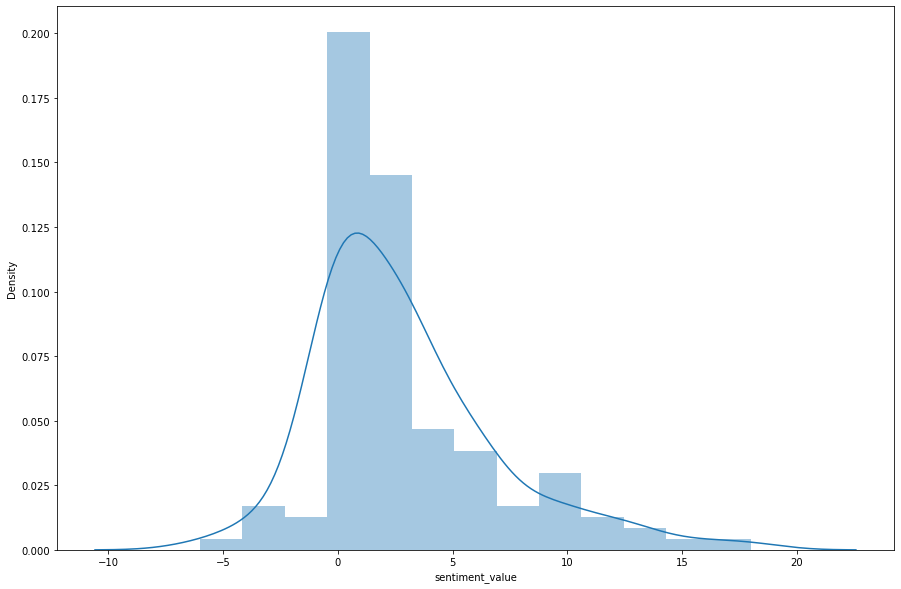

In [78]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

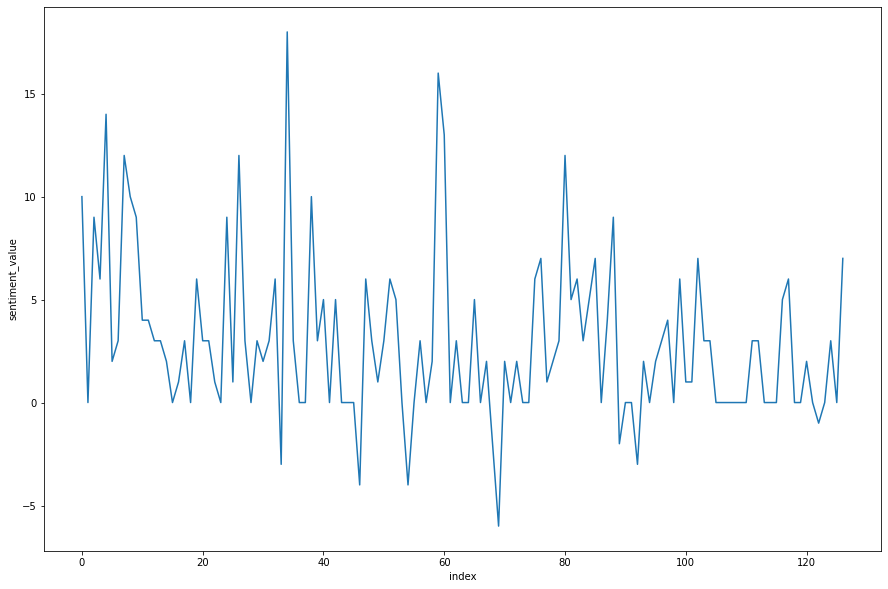

In [79]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

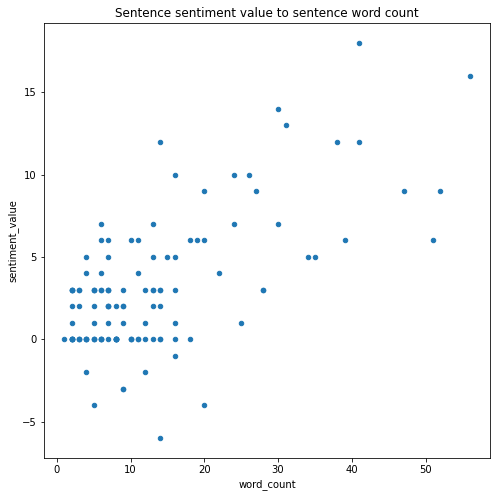

In [80]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')